In [33]:
# Trial and error with URL

In [34]:
import pandas as pd
import csv
from preNLP import flat_DOCS
from preNLP import process_texts

In [35]:
# Loading database
URL =   "https://raw.githubusercontent.com/it-ces/Datasets/main/lyrisc.csv"
documents = []
with open("lyrisc.csv", newline='', encoding='utf-8') as csvfile:
  csv_reader = csv.reader(csvfile)
  for row in csv_reader:
    documents.append(row)   

In [36]:
DOCS = process_texts(documents)
corpus = flat_DOCS(DOCS)

In [37]:
corpus[0:4]

['oye morenita te vas a quedar muy sola porque anoche dijo el radio que abrieron el liceo como es estudiante ya se va escalona pero de recuerdo te dejo un paseo  bis   que te habla de aquel inmenso amor  que llevo  dentro del corazon  y dice todo lo que yo siento  que es pura pasion y sentimiento  cantando con el lenguaje grato que tiene la tierra  e pedro castro  bis   adios morenita me voy por la madrugada no quiero que me llores porque me da dolor  paso por valencia cojo la sabana  caracolicito y llego a fundacion  bis   y entonces me tengo que meter  en un diablo al que le llaman tren  ay  que sale por toa la zona pasa  y de tarde  se mete a santa marta   que sale por to a la zona pasa y de tarde se mete a santa marta  bis   ese orgullo que tu tienes no es muy bueno te juro que que mas tarde te vas a arrepentir  yo solo he querido dejarte un recuerdo porque en santa marta me puedo morir  y entonces  me tienes que llorar  y de ñapa te tienes que poner  traje negro  aunque no gustes 

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import string
from nltk.corpus import  stopwords
from nltk.stem import SnowballStemmer
import json
import glob
import re

In [39]:
import nltk
nltk.download('stopwords') # to ensure latest version...

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sjrp2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
custom_stop_words = set(["bis","te", "eres", "canto", "vas", "dire",  "llevar", "pedro", "adaluz", "tu", "andaluz", "estar",
                         "vamos", "quiza", "algun", "rafa", "iremo", "ir", "ay", "si", "pa", "gustavo", "rafael", "simon", 
                         "consigo", "él", "dina", "luz", "marina",  "entonces",
                         "dejo", "escalona", "jaime", "molina", "tobías", "carmen", "voy", "ahora", "hombe", "del",
                         "toa", "poncho", "va", "aquel", "mire", "dicen", "sigo", "adonde", "nadie", "nunca", "adios",
                         "eres", "oye", "puso", "poner", "estamos", "mande", "cuando", "enero", "febrero", "dijo",
                         "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "contarles",
                         "noviembre","diciembre", "año", "mes", "dia",  "alla", "aqui", "hacer", "maria", "tere", "rosalbita",
                         "lunes", "martes", "miercoles", "jueves", "viernes", "mas", "mañana", "ayer"])  # Add words you want to exclude
stop_words = set(stopwords.words('spanish')) | custom_stop_words  # Combine NLTK stopwords with custom stop words
# print(stop_words)  you can see the stop words!
DOCS

[['oye morenita te vas a quedar muy sola porque anoche dijo el radio que abrieron el liceo como es estudiante ya se va escalona pero de recuerdo te dejo un paseo  bis   que te habla de aquel inmenso amor  que llevo  dentro del corazon  y dice todo lo que yo siento  que es pura pasion y sentimiento  cantando con el lenguaje grato que tiene la tierra  e pedro castro  bis   adios morenita me voy por la madrugada no quiero que me llores porque me da dolor  paso por valencia cojo la sabana  caracolicito y llego a fundacion  bis   y entonces me tengo que meter  en un diablo al que le llaman tren  ay  que sale por toa la zona pasa  y de tarde  se mete a santa marta   que sale por to a la zona pasa y de tarde se mete a santa marta  bis   ese orgullo que tu tienes no es muy bueno te juro que que mas tarde te vas a arrepentir  yo solo he querido dejarte un recuerdo porque en santa marta me puedo morir  y entonces  me tienes que llorar  y de ñapa te tienes que poner  traje negro  aunque no gustes

In [41]:
"ir" in  stop_words

True

In [42]:
for word in stop_words:
    print(word)

habían
consigo
mas
para
tuvieses
también
sean
está
sentid
suyas
seas
tenéis
otros
habrían
diciembre
mayo
nos
serán
rafa
hubieras
sentidos
tiene
hubierais
tuyo
eran
tuviera
mes
hubiste
fui
cual
su
estaba
hube
hubiéramos
adonde
puso
julio
hayas
molina
ti
unos
de
que
éramos
más
eso
eras
maria
tengan
estarías
entonces
hacer
tenías
alla
tendré
vamos
habéis
esa
tuviéramos
agosto
había
estada
hayáis
pa
toa
estuviese
has
vuestros
tobías
tenidos
soy
tenemos
nuestras
seamos
fuésemos
estuve
habidos
estuviste
suyos
fuerais
tendrá
vuestra
esos
mire
ni
estamos
tuvisteis
dicen
marzo
tuve
fuéramos
simon
mía
contra
ay
contarles
tenida
ellas
sentidas
mí
habríais
otra
qué
habréis
algun
esté
tienen
tuviésemos
lunes
ahora
poco
tengas
estuviera
durante
estuvieses
tuviste
esas
estén
va
estarás
nosotras
dejo
tened
mías
junio
tendrías
o
ha
tenía
bis
adios
uno
habíamos
las
antes
gustavo
habiendo
habida
poncho
hayan
sigo
algunos
tanto
habrías
tuvieseis
ya
ante
estaré
fuimos
estáis
tendríais
marina
serás
te
seré


In [43]:
for doc in corpus[0:3]:
    print(doc.split(" "))

['oye', 'morenita', 'te', 'vas', 'a', 'quedar', 'muy', 'sola', 'porque', 'anoche', 'dijo', 'el', 'radio', 'que', 'abrieron', 'el', 'liceo', 'como', 'es', 'estudiante', 'ya', 'se', 'va', 'escalona', 'pero', 'de', 'recuerdo', 'te', 'dejo', 'un', 'paseo', '', 'bis', '', '', 'que', 'te', 'habla', 'de', 'aquel', 'inmenso', 'amor', '', 'que', 'llevo', '', 'dentro', 'del', 'corazon', '', 'y', 'dice', 'todo', 'lo', 'que', 'yo', 'siento', '', 'que', 'es', 'pura', 'pasion', 'y', 'sentimiento', '', 'cantando', 'con', 'el', 'lenguaje', 'grato', 'que', 'tiene', 'la', 'tierra', '', 'e', 'pedro', 'castro', '', 'bis', '', '', 'adios', 'morenita', 'me', 'voy', 'por', 'la', 'madrugada', 'no', 'quiero', 'que', 'me', 'llores', 'porque', 'me', 'da', 'dolor', '', 'paso', 'por', 'valencia', 'cojo', 'la', 'sabana', '', 'caracolicito', 'y', 'llego', 'a', 'fundacion', '', 'bis', '', '', 'y', 'entonces', 'me', 'tengo', 'que', 'meter', '', 'en', 'un', 'diablo', 'al', 'que', 'le', 'llaman', 'tren', '', 'ay', '', '

In [44]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
for doc in corpus[0:3]:
    print(tokenizer.tokenize(doc)) # Note that this method not suffer of '' empty tokens!

['oye', 'morenita', 'te', 'vas', 'a', 'quedar', 'muy', 'sola', 'porque', 'anoche', 'dijo', 'el', 'radio', 'que', 'abrieron', 'el', 'liceo', 'como', 'es', 'estudiante', 'ya', 'se', 'va', 'escalona', 'pero', 'de', 'recuerdo', 'te', 'dejo', 'un', 'paseo', 'bis', 'que', 'te', 'habla', 'de', 'aquel', 'inmenso', 'amor', 'que', 'llevo', 'dentro', 'del', 'corazon', 'y', 'dice', 'todo', 'lo', 'que', 'yo', 'siento', 'que', 'es', 'pura', 'pasion', 'y', 'sentimiento', 'cantando', 'con', 'el', 'lenguaje', 'grato', 'que', 'tiene', 'la', 'tierra', 'e', 'pedro', 'castro', 'bis', 'adios', 'morenita', 'me', 'voy', 'por', 'la', 'madrugada', 'no', 'quiero', 'que', 'me', 'llores', 'porque', 'me', 'da', 'dolor', 'paso', 'por', 'valencia', 'cojo', 'la', 'sabana', 'caracolicito', 'y', 'llego', 'a', 'fundacion', 'bis', 'y', 'entonces', 'me', 'tengo', 'que', 'meter', 'en', 'un', 'diablo', 'al', 'que', 'le', 'llaman', 'tren', 'ay', 'que', 'sale', 'por', 'toa', 'la', 'zona', 'pasa', 'y', 'de', 'tarde', 'se', 'met

In [45]:
stemmer = SnowballStemmer('spanish')
for doc in corpus[0:3]:
   tokens = tokenizer.tokenize(doc) # Note that this method not suffer of '' empty tokens!
   print(tokens)
   tokens =  [stemmer.stem(token) for token in tokens]  # Stemming and stop word removal
   print(tokens)


['oye', 'morenita', 'te', 'vas', 'a', 'quedar', 'muy', 'sola', 'porque', 'anoche', 'dijo', 'el', 'radio', 'que', 'abrieron', 'el', 'liceo', 'como', 'es', 'estudiante', 'ya', 'se', 'va', 'escalona', 'pero', 'de', 'recuerdo', 'te', 'dejo', 'un', 'paseo', 'bis', 'que', 'te', 'habla', 'de', 'aquel', 'inmenso', 'amor', 'que', 'llevo', 'dentro', 'del', 'corazon', 'y', 'dice', 'todo', 'lo', 'que', 'yo', 'siento', 'que', 'es', 'pura', 'pasion', 'y', 'sentimiento', 'cantando', 'con', 'el', 'lenguaje', 'grato', 'que', 'tiene', 'la', 'tierra', 'e', 'pedro', 'castro', 'bis', 'adios', 'morenita', 'me', 'voy', 'por', 'la', 'madrugada', 'no', 'quiero', 'que', 'me', 'llores', 'porque', 'me', 'da', 'dolor', 'paso', 'por', 'valencia', 'cojo', 'la', 'sabana', 'caracolicito', 'y', 'llego', 'a', 'fundacion', 'bis', 'y', 'entonces', 'me', 'tengo', 'que', 'meter', 'en', 'un', 'diablo', 'al', 'que', 'le', 'llaman', 'tren', 'ay', 'que', 'sale', 'por', 'toa', 'la', 'zona', 'pasa', 'y', 'de', 'tarde', 'se', 'met

In [46]:
import spacy
nlp= spacy.load("es_core_news_lg")

In [47]:
for doc in corpus[0:3]:
   tokens = tokenizer.tokenize(doc) # Note that this method not suffer of '' empty tokens!
   lemmas =  [nlp(token)[0].lemma_ for token in tokens]  # Stemming and stop word removal
   print(tokens)
   print(lemmas)

['oye', 'morenita', 'te', 'vas', 'a', 'quedar', 'muy', 'sola', 'porque', 'anoche', 'dijo', 'el', 'radio', 'que', 'abrieron', 'el', 'liceo', 'como', 'es', 'estudiante', 'ya', 'se', 'va', 'escalona', 'pero', 'de', 'recuerdo', 'te', 'dejo', 'un', 'paseo', 'bis', 'que', 'te', 'habla', 'de', 'aquel', 'inmenso', 'amor', 'que', 'llevo', 'dentro', 'del', 'corazon', 'y', 'dice', 'todo', 'lo', 'que', 'yo', 'siento', 'que', 'es', 'pura', 'pasion', 'y', 'sentimiento', 'cantando', 'con', 'el', 'lenguaje', 'grato', 'que', 'tiene', 'la', 'tierra', 'e', 'pedro', 'castro', 'bis', 'adios', 'morenita', 'me', 'voy', 'por', 'la', 'madrugada', 'no', 'quiero', 'que', 'me', 'llores', 'porque', 'me', 'da', 'dolor', 'paso', 'por', 'valencia', 'cojo', 'la', 'sabana', 'caracolicito', 'y', 'llego', 'a', 'fundacion', 'bis', 'y', 'entonces', 'me', 'tengo', 'que', 'meter', 'en', 'un', 'diablo', 'al', 'que', 'le', 'llaman', 'tren', 'ay', 'que', 'sale', 'por', 'toa', 'la', 'zona', 'pasa', 'y', 'de', 'tarde', 'se', 'met

In [48]:
corpus

['oye morenita te vas a quedar muy sola porque anoche dijo el radio que abrieron el liceo como es estudiante ya se va escalona pero de recuerdo te dejo un paseo  bis   que te habla de aquel inmenso amor  que llevo  dentro del corazon  y dice todo lo que yo siento  que es pura pasion y sentimiento  cantando con el lenguaje grato que tiene la tierra  e pedro castro  bis   adios morenita me voy por la madrugada no quiero que me llores porque me da dolor  paso por valencia cojo la sabana  caracolicito y llego a fundacion  bis   y entonces me tengo que meter  en un diablo al que le llaman tren  ay  que sale por toa la zona pasa  y de tarde  se mete a santa marta   que sale por to a la zona pasa y de tarde se mete a santa marta  bis   ese orgullo que tu tienes no es muy bueno te juro que que mas tarde te vas a arrepentir  yo solo he querido dejarte un recuerdo porque en santa marta me puedo morir  y entonces  me tienes que llorar  y de ñapa te tienes que poner  traje negro  aunque no gustes 

In [49]:
corpus_tokens = []
for doc in corpus:
    print(doc)
    lemmas = []
    for token in tokenizer.tokenize(doc):
        if token not in stop_words:   #Avoid words that are in stop_words
            lemma = nlp(token)[0].lemma_  #find the base word
            if len(lemma.split(" "))<2 and lemma not in stop_words:   #Avoid a base with two words or more!
                lemmas.append(lemma)
    corpus_tokens.append(lemmas)
    print(lemmas)

oye morenita te vas a quedar muy sola porque anoche dijo el radio que abrieron el liceo como es estudiante ya se va escalona pero de recuerdo te dejo un paseo  bis   que te habla de aquel inmenso amor  que llevo  dentro del corazon  y dice todo lo que yo siento  que es pura pasion y sentimiento  cantando con el lenguaje grato que tiene la tierra  e pedro castro  bis   adios morenita me voy por la madrugada no quiero que me llores porque me da dolor  paso por valencia cojo la sabana  caracolicito y llego a fundacion  bis   y entonces me tengo que meter  en un diablo al que le llaman tren  ay  que sale por toa la zona pasa  y de tarde  se mete a santa marta   que sale por to a la zona pasa y de tarde se mete a santa marta  bis   ese orgullo que tu tienes no es muy bueno te juro que que mas tarde te vas a arrepentir  yo solo he querido dejarte un recuerdo porque en santa marta me puedo morir  y entonces  me tienes que llorar  y de ñapa te tienes que poner  traje negro  aunque no gustes de

In [50]:
corpus_tokens

[['morenita',
  'quedar',
  'solo',
  'anoche',
  'radio',
  'abrir',
  'liceo',
  'estudiante',
  'recordar',
  'paseo',
  'hablar',
  'inmenso',
  'amor',
  'dentro',
  'corazon',
  'decir',
  'sentir',
  'puro',
  'pasion',
  'sentimiento',
  'cantar',
  'lenguaje',
  'grato',
  'tierra',
  'castro',
  'morenita',
  'madrugada',
  'querer',
  'llor',
  'dar',
  'dolor',
  'paso',
  'valencia',
  'coger',
  'sabana',
  'caracolicito',
  'llego',
  'fundacion',
  'meter',
  'diablo',
  'llamar',
  'tren',
  'salir',
  'zona',
  'pasar',
  'tarde',
  'meter',
  'santo',
  'marta',
  'salir',
  'to',
  'zona',
  'pasar',
  'tarde',
  'meter',
  'santo',
  'marta',
  'orgullo',
  'bueno',
  'jurar',
  'tarde',
  'arrepentir',
  'solo',
  'querido',
  'recordar',
  'santo',
  'marta',
  'poder',
  'morir',
  'llorar',
  'ñapa',
  'traje',
  'negro',
  'aunque',
  'gustser',
  'arrepentir',
  'hiciste',
  'sufrir'],
 ['hacerte',
  'casa',
  'aire',
  'solamente',
  'vivo',
  'despues',
  '

In [51]:
for i in range(len(corpus_tokens)):
    if "  " in corpus_tokens[i]  or " " in corpus_tokens[i]:
        print("ok")

In [52]:
"él" in corpus_tokens[1]

False

In [53]:
corpus_tokens 
corpus_processed = [' '.join([word for word in doc]) for doc in corpus_tokens]

In [54]:
corpus_tokens[9]

['señor',
 'nuevo',
 'encanto',
 'sabana',
 'señor',
 'nuevo',
 'encanto',
 'sabana',
 'adelanto',
 'lugar',
 'diosa',
 'coronado',
 'vida',
 'buen',
 'adelanto',
 'diosa',
 'encanto',
 'corona',
 'reina',
 'bello',
 'magdalena',
 'corona',
 'reina',
 'bello',
 'magdalena',
 'paso',
 'contar',
 'siguiente',
 'conocer',
 'diosa',
 'rey',
 'querido',
 'paso',
 'contar',
 'siguiente',
 'conocer',
 'diosa',
 'rey',
 'querido',
 'nombre',
 'diosa',
 'gente',
 'grado',
 'distinguido',
 'vivir',
 'mismo',
 'movimiento',
 'mismo',
 'pensamiento',
 'vivir',
 'alegre',
 'sabana',
 'diosa',
 'coronado',
 'cantar',
 'pobre',
 'leandro',
 'diaz',
 'triste',
 'serranio',
 'cantar',
 'pobre',
 'leandro',
 'diaz',
 'triste',
 'serranio',
 'rey',
 'querido',
 'llegar',
 'tarde',
 'serranio',
 'gallina',
 'rellenar',
 'rey',
 'fino',
 'madre',
 'mio',
 'mesa',
 'bien',
 'servido',
 'saber',
 'rey',
 'gente',
 'fino',
 'gran',
 'arroz',
 'volar',
 'coma',
 'rey',
 'considerado',
 'gran',
 'arroz',
 'vola

In [55]:
vectorizer = TfidfVectorizer() #ngram could be a parameter
X = vectorizer.fit_transform(corpus_processed)
vectorizer.get_feature_names_out()

array(['abajo', 'abandonar', 'ablandar', ..., 'zona', 'zuleta', 'ñapa'],
      dtype=object)

In [56]:
for i in vectorizer.get_feature_names_out():
    print(i)

abajo
abandonar
ablandar
aborrecia
abraham
abrazador
abrazar
abriar
abrir
absurdo
aburrido
abusar
acabar
acabariar
acabaste
acalora
acariciar
acaso
accediste
aceptacion
aceptar
acercar
acompañao
acompañar
acompañenme
acordar
acordeon
acordeonero
acordeonista
acordeón
acorralado
acorralar
acostar
acostumbrado
actitud
acudi
acuerdo
acurdo
adelante
adelanto
adentro
adero
admirar
adolfo
adoracion
adorado
adorar
adornar
afan
afecto
aferrar
afiliacionir
agarraste
agil
agonia
agonizar
agotar
agradable
agradecer
agrupación
agua
aguacero
aguantar
aguante
ahi
ahijar
ahogao
ahogar
ahogo
ahorcar
ahorito
ahy
aire
ajeno
ajuyo
ala
alardear
alborada
alcalde
alcance
alcanzar
alegrar
alegre
alegremente
alegria
alejar
alejaste
alfonso
alfredo
algarabio
alguien
alguno
alicia
aliento
alistar
aliviar
alivio
alli
alma
almirante
altar
alto
alzar
amable
amado
amanecer
amar
amargo
amargura
amarillo
amazona
ambiente
amenezca
amiga
amigo
amiguita
amistad
amor
amoroso
amparado
amuleto
ancio
andar
andario
andres
an

In [57]:
model = KMeans(n_clusters=3, init='k-means++', max_iter=1000)
model.fit(X)

c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=1000, n_clusters=3)

In [58]:
#################################
## LDA modelling             ####
################################
import gensim
import gensim.corpora as corpora
from gensim.utils import  simple_preprocess
from gensim.models import CoherenceModel
#spacy
import spacy
from nltk.corpus import stopwords
#Visualization
import pyLDAvis
import pyLDAvis.gensim
import warnings

In [59]:
# Bag of word
# Example!
test  =  [["morenita", "ojos", "negros","morenita", "morenita", "cine"], 
          ["condor", "herido", "alma", "condor", "hijos" ,"condor","herido" ,"condor"],
          ["golondrina", "golondrina", "luz", "arcoirís", "ojos"]]
# Assing a unique interger value to each token in test
Dictionary = corpora.Dictionary(test)
print(Dictionary.token2id)
#Create a bag of words 
BagOfWords =  [Dictionary.doc2bow(text) for text in  test]
BagOfWords

{'cine': 0, 'morenita': 1, 'negros': 2, 'ojos': 3, 'alma': 4, 'condor': 5, 'herido': 6, 'hijos': 7, 'arcoirís': 8, 'golondrina': 9, 'luz': 10}


[[(0, 1), (1, 3), (2, 1), (3, 1)],
 [(4, 1), (5, 4), (6, 2), (7, 1)],
 [(3, 1), (8, 1), (9, 2), (10, 1)]]

In [60]:
# Using  corpus_tokens
# mapping each token to a unique integer number!
id2word = corpora.Dictionary(corpus_tokens)
# Optionally filter dictionary, e.g., remove words that appear in less than 2 documents
#id2word.filter_extremes(no_below=10, no_above=4)
#he dictionary can be further processed to remove infrequent or too common words. 
#This step can help improve the quality of the topic model by removing noisy or uninformative terms.
print(id2word.token2id)

{'abrir': 0, 'amor': 1, 'anoche': 2, 'arrepentir': 3, 'aunque': 4, 'bueno': 5, 'cantar': 6, 'caracolicito': 7, 'castro': 8, 'coger': 9, 'corazon': 10, 'dar': 11, 'decir': 12, 'dentro': 13, 'diablo': 14, 'dolor': 15, 'estudiante': 16, 'fundacion': 17, 'grato': 18, 'gustser': 19, 'hablar': 20, 'hiciste': 21, 'inmenso': 22, 'jurar': 23, 'lenguaje': 24, 'liceo': 25, 'llamar': 26, 'llego': 27, 'llor': 28, 'llorar': 29, 'madrugada': 30, 'marta': 31, 'meter': 32, 'morenita': 33, 'morir': 34, 'negro': 35, 'orgullo': 36, 'pasar': 37, 'paseo': 38, 'pasion': 39, 'paso': 40, 'poder': 41, 'puro': 42, 'quedar': 43, 'querer': 44, 'querido': 45, 'radio': 46, 'recordar': 47, 'sabana': 48, 'salir': 49, 'santo': 50, 'sentimiento': 51, 'sentir': 52, 'solo': 53, 'sufrir': 54, 'tarde': 55, 'tierra': 56, 'to': 57, 'traje': 58, 'tren': 59, 'valencia': 60, 'zona': 61, 'ñapa': 62, 'aire': 63, 'alguno': 64, 'angelito': 65, 'aviador': 66, 'bien': 67, 'blanco': 68, 'camino': 69, 'casa': 70, 'cielo': 71, 'cimiento'

In [61]:
# Uniques words and their frequncy 
corpus = [id2word.doc2bow(text) for text in  corpus_tokens]

Coherence Score: 0.3320360828237464


C:\Users\sjrp2\AppData\Local\Temp\ipykernel_5424\2206782389.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([word[0] for word in topic[1]], rotation=45, ha='right')


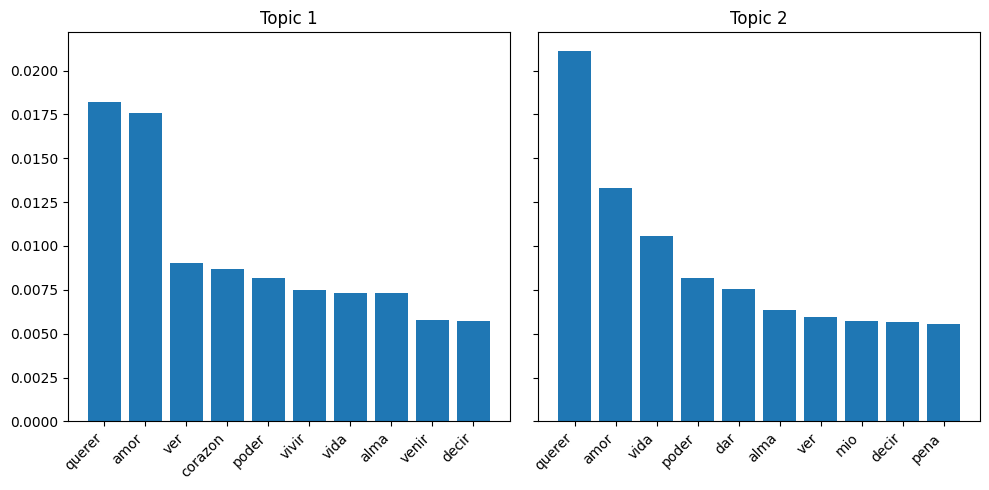

In [62]:
# Arguments in our model
# number of topics is essential
# passes is the number of epochs or iterations across the entire dataset...
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

num_topics= 3
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=id2word, passes=15)



# Calculate coherence score
coherence_model = CoherenceModel(model=lda_model, texts=corpus_tokens, dictionary=id2word, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("Coherence Score:", coherence_score)



# Visualize the topics using pyLDAvis
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

pyLDAvis.display(vis)

topics = lda_model.show_topics(formatted=False)
fig, axes = plt.subplots(1, num_topics, figsize=(10, 5), sharey=True)
for i, (topic, ax) in enumerate(zip(topics, axes.flatten())):
    ax.bar([word[0] for word in topic[1]], [word[1] for word in topic[1]])
    ax.set_title(f'Topic {i+1}')
    ax.set_xticklabels([word[0] for word in topic[1]], rotation=45, ha='right')
plt.tight_layout()
plt.show()